# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [3]:
DATA_PATH = Path("data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [4]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [5]:
df = pd.read_csv(dataframe_path, index_col=0)
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

# Import libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, PrecisionRecallDisplay
from sklearn.metrics import make_scorer, average_precision_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# install xgboost if needed
try:
    from xgboost import XGBClassifier
except ImportError:
    ! pip install xgboost
    from xgboost import XGBClassifier

# Data Preprocessing

In [7]:
# print detailed statistics for each column
df_statistics = df.describe()
for c in df_statistics.columns:
    print(f"{c} : \n {df_statistics[c]} \n")

distance_fire_stations : 
 count     22030.000000
mean      23646.387792
std       19248.657525
min           0.000000
25%        9568.829605
50%       18494.931738
75%       32310.988843
max      110474.261708
Name: distance_fire_stations, dtype: float64 

distance_rivers : 
 count    22030.000000
mean      5966.777537
std       7515.660146
min          0.000000
25%        707.106781
50%       2610.076627
75%       8384.323013
max      43784.986011
Name: distance_rivers, dtype: float64 

distance_roads : 
 count    22030.000000
mean      5152.597702
std       6924.754655
min          0.000000
25%        250.000000
50%       1581.138830
75%       7941.190087
max      40094.419811
Name: distance_roads, dtype: float64 

distance_powerlines : 
 count     22030.000000
mean      30127.951951
std       30099.446768
min           0.000000
25%        8265.137627
50%       20846.161854
75%       41340.053217
max      159274.919557
Name: distance_powerlines, dtype: float64 

cropland : 
 count  

In [8]:
print(f"Unique values in forest_deciduous_needle : {df.forest_deciduous_needle.unique().tolist()}")
print(f"NA values in forest_deciduous_needle : {df.forest_deciduous_needle.isna().sum()}")
print(f"NA values in forest_deciduous_broad : {df.forest_deciduous_broad.isna().sum()}")

print(f"Overlap of NA values between forest_deciduous_broad & forest_deciduous_needle : {(df.forest_deciduous_broad.isna() & df.forest_deciduous_needle.isna()).sum()}")

Unique values in forest_deciduous_needle : [0.0, nan]
NA values in forest_deciduous_needle : 5
NA values in forest_deciduous_broad : 5
Overlap of NA values between forest_deciduous_broad & forest_deciduous_needle : 5


In [9]:
print(f"Unique values in forest_evergreen_needle : {df.forest_evergreen_needle.unique().tolist()}")
print(f"NA values in forest_evergreen_needle : {df.forest_evergreen_needle.isna().sum()}")
print(f"NA values in forest_evergreen_broad : {df.forest_evergreen_broad.isna().sum()}")

print(f"Overlap of NA values between forest_evergreen_broad & forest_evergreen_needle : {(df.forest_evergreen_broad.isna() & df.forest_evergreen_needle.isna()).sum()}")

Unique values in forest_evergreen_needle : [0.0, -100000.0, nan]
NA values in forest_evergreen_needle : 5
NA values in forest_evergreen_broad : 5
Overlap of NA values between forest_evergreen_broad & forest_evergreen_needle : 5


In [10]:
forest_columns = ['forest_deciduous_broad', 'forest_evergreen_broad', 'forest_unknown']
print(f"Number of rows where 'forest' column matches exactly: {(df[forest_columns].sum(axis=1) == df['forest']).sum()} out of {len(df)}")

Number of rows where 'forest' column matches exactly: 21261 out of 22035


We can see that not all rows match exactly so maybe it is due to numerical precision. Let's compare the values within an interval of 1\%.

In [11]:
tolerance = 0.01

# sum of forest columns
forest_sum = df[forest_columns].sum(axis=1)

# define interval within tolerance range
lower_bound = forest_sum * (1 - tolerance)
upper_bound = forest_sum * (1 + tolerance)

# check whether the forest column is between the upper and lower limits
within_range = df['forest'].between(lower_bound, upper_bound)
print(f"Number of rows where 'forest' column matches within the {tolerance * 100:.0f} %: {within_range.sum()} out of {len(df)}")

Number of rows where 'forest' column matches within the 1 %: 22035 out of 22035


In [12]:
print(f"Years in df : {sorted(df.Year.unique().tolist())}")

Years in df : [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


### Conclusions

From the description of continuous features, we observe the following things:

- Overall the `distance_{feature}` exhibit high variance but they seem okay.

- The `forest_deciduous_needle` column contains mostly 0s and NAs. Analysis shows that the NAs appear exactly at the same locations in `forest_deciduous_needle` and `forest_deciduous_broad` which means that these two columns have the same cause of missing values. We keep only `forest_deciduous_broad` for the rest of the notebook.

- We have exactly the same pattern of 0s, -100000 and NAs in `forest_evergreen_needle` so we remove it too and keep only `forest_evergreen_broad`.

- The same applies for `forest_mixed` and `moss_lichen` where we have only 0s and NAs. We remove these two columns.

- The `aspect` column looks good and the values lie in the range [0, 360] degrees which is consistent.

- The `elevation` column is suprising beacuse it shows that the minimum elevation point is at -100. If the elevation is measured in reference to sea level then this is likely an error but since we do not have further information we can keep it as is.

- The `pop_dens` column looks fine but the maximum value is at 2200 people/km² which is too high for an area covered in forests.

- `max_temp` has a smaller range than that of `avg_temp` which might mean that they are expressed in different units. Since `avg_temp` has an average of 158 it can not be in Degrees celsius (°C) or Fahrenheit. It could be in Kelvin.

- The `avg_wind_angle` column looks good and the values lie in the range [0, 360] degrees which is consistent.

- The minimum `sum_prec` is negative which indicates a measurement error and since the value is so small (-0.000007) we can set it to 0.

- The `forest` is indeed the sum (within a threshold) of all columns that start with `forest` given that we exclude : `forest_deciduous_needle`, `forest_evergreen_needle` and `forest_mixed`.

- The `Year` column spans the period from 2001 to 2021 with no missing years.

- All other columns look fine in terms of descriptive statistics. We will look more into each feature in the EDA section.

In [13]:
# set small negative value in sum_prec to 0.
df.sum_prec = df.sum_prec.apply(lambda x: 0 if x < 0 else x)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22035 entries, 0 to 22034
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     22035 non-null  object 
 1   distance_fire_stations   22030 non-null  float64
 2   distance_rivers          22030 non-null  float64
 3   distance_roads           22030 non-null  float64
 4   distance_powerlines      22030 non-null  float64
 5   cropland                 22030 non-null  float64
 6   forest_deciduous_broad   22030 non-null  float64
 7   forest_deciduous_needle  22030 non-null  float64
 8   forest_evergreen_broad   22030 non-null  float64
 9   forest_evergreen_needle  22030 non-null  float64
 10  forest_mixed             22030 non-null  float64
 11  forest_unknown           22030 non-null  float64
 12  herbaceous_vegetation    22030 non-null  float64
 13  moss_lichen              22030 non-null  float64
 14  shrubland             

In [15]:
# percentage of missing values in each column
print(f"Missing values in each column: \n {df.isnull().sum().sort_values(ascending=False)}")

Missing values in each column: 
 yearly_avg_temp            6831
vegetation_class             32
forest_mixed                  5
distance_fire_stations        5
wetland                       5
water                         5
urban                         5
shrubland                     5
moss_lichen                   5
forest_unknown                5
sprarse_vegetation            5
forest_evergreen_needle       5
forest_evergreen_broad        5
forest_deciduous_needle       5
forest_deciduous_broad        5
cropland                      5
distance_powerlines           5
distance_roads                5
distance_rivers               5
herbaceous_vegetation         5
sum_prec                      0
avg_wind_angle                0
avg_rel_hum                   0
avg_soil                      0
Date                          0
forest                        0
Year                          0
max_max_temp                  0
max_wind_vel                  0
avg_temp                      0
pop_den

The column `yearly_avg_temp` contains 31\% of NaNs : we can either try to impute the missing values at the risk of introducing noise or we can simply drop this column. First we will drop it to not introduce unnecessary noise in the data. Then at the end we will add it to see whether it improves the models.

The other columns have only 5 missing values so no need to try and impute them and we can safely drop these rows.

In [16]:
# fill NA value in yearly_avg_temp using the last known value since it is a time series this makes sense.
impute_yearly_avg_temp = False
if impute_yearly_avg_temp:
    df['yearly_avg_temp'] = df['yearly_avg_temp'].fillna(method='ffill').fillna(method='bfill')
else:
    df.drop(columns=['yearly_avg_temp'], axis=1, inplace=True)

In [17]:
# drop columns according to all previous analysis
columns_to_drop = ['forest_deciduous_needle', 'forest_evergreen_needle', 'forest_mixed', 'moss_lichen']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

Let's look at categorical variables : vegetation_class and Date;

### vegetation_class

The vegetation class contains 32 missing values which we will impute using the fact that the vegetation class is determined as the vegetation which has the largest ratio among the columns from `cropland` to `wetland`.

In [18]:
# vegetation column : cropland to wetland in df while excluding erronuous columns
vegetation_columns = ['cropland', 'forest_deciduous_broad', 'forest_evergreen_broad', 'forest_unknown',
                     'herbaceous_vegetation', 'shrubland', 'sprarse_vegetation', 'urban', 'water', 'wetland']

# define a mapping between column names and vegetation classes
mapping = {
    'cropland': 'cropland'
}

# impute the missing vegetation class with the vegetation column with the biggest ratio
df.loc[df['vegetation_class'].isna(), 'vegetation_class'] = df[vegetation_columns].idxmax(axis=1).map(mapping)[df['vegetation_class'].isna()]

In [19]:
df.vegetation_class.value_counts()

forest                     9124
water                      8108
herbaceous_vegetation      3850
Forestt                     549
wetland                     224
urban                        81
shrubland                    66
cropland                     27
$herb$aceous_vegetation       1
Name: vegetation_class, dtype: int64

The imputation added a new vegetation class `cropland` with a very small frequency in the dataset. One could also completely drop the corresponding rows since they are only 32 of them.

There is a mispelling of the word `forest` and an additional dollar sign $ in `herbaceous_vegetation`. These two things should represent the same thing.

In [20]:
# correct typos
df.vegetation_class = df.vegetation_class.replace('Forestt', 'forest')
df.vegetation_class = df.vegetation_class.replace('$herb$aceous_vegetation', 'herbaceous_vegetation')
df.vegetation_class.value_counts()

forest                   9673
water                    8108
herbaceous_vegetation    3851
wetland                   224
urban                      81
shrubland                  66
cropland                   27
Name: vegetation_class, dtype: int64

In [21]:
# drop rows with NaNs (only 5 values per column)
df.dropna(inplace=True)

Now let's verify the statement given in the description : "The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1."

In [22]:
# check if the sum of ratios equals 1, for some reason there is a small difference for some values( smaller than 0.000001)
correct_sum = df[vegetation_columns].sum(axis=1).apply(lambda x: 0.999999 <= x <= 1.0)

print(f"Rows with sum of ratios approximately equal to 1: {correct_sum.sum()} out of {len(df)}")

Rows with sum of ratios approximately equal to 1: 22030 out of 22030


### Date

The month of the year can be used to enhance the previous features as the wildfires could have a seasonal pattern. If we want to do that we can extract the month from the `Date` column. That would introduce 12 additional variabilities and could make the models overfit but it's worth a try.

In [23]:
# If we want to add the month of the year as a feature
# df['month'] = pd.to_datetime(df.Date).dt.month.astype(str)
# df.month

# drop the Date column as we already have the Year column
df.drop(columns=['Date'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22030 entries, 0 to 22034
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   distance_fire_stations  22030 non-null  float64
 1   distance_rivers         22030 non-null  float64
 2   distance_roads          22030 non-null  float64
 3   distance_powerlines     22030 non-null  float64
 4   cropland                22030 non-null  float64
 5   forest_deciduous_broad  22030 non-null  float64
 6   forest_evergreen_broad  22030 non-null  float64
 7   forest_unknown          22030 non-null  float64
 8   herbaceous_vegetation   22030 non-null  float64
 9   shrubland               22030 non-null  float64
 10  sprarse_vegetation      22030 non-null  float64
 11  urban                   22030 non-null  float64
 12  water                   22030 non-null  float64
 13  wetland                 22030 non-null  float64
 14  aspect                  22030 non-null

# Exploratory Data Analysis

In [25]:
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_unknown,herbaceous_vegetation,shrubland,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.000000,0.000000,0.0,...,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.416667,0.166667,0.0,...,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.333333,0.000000,0.0,...,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.000000,0.166667,0.0,...,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.166667,0.083333,0.0,...,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,1


Let's start with the target distribution :

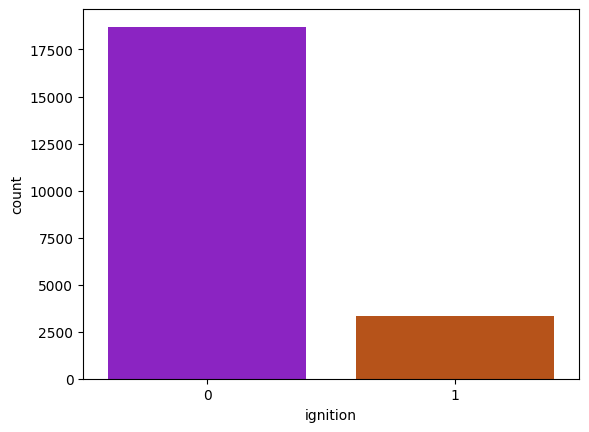

In [26]:
sns.countplot(x='ignition', data=df, palette='gnuplot');

In [27]:
print(f"There are only {df.ignition.sum()} positive records and {(1 - df.ignition).sum()} negative ones")
print(f"The positive class represents only {df.ignition.sum() / len(df)* 100:.2f}% of the whole dataset.")

There are only 3320 positive records and 18710 negative ones
The positive class represents only 15.07% of the whole dataset.


We are dealing with a binary classification problem with a high imbalance in class distribution. This is important for choosing an appropriate metric able to capture the real performance of models. We can not use the accuracy because a simple model that predicts the 0 class all the time would get an accuracy of around 85%.

Since we want to predict probabilities of an ignition instead of just the class and because the positive class is more important than the negative class we will use Precision-Recall AUC as our metric.

### Correlation matrix

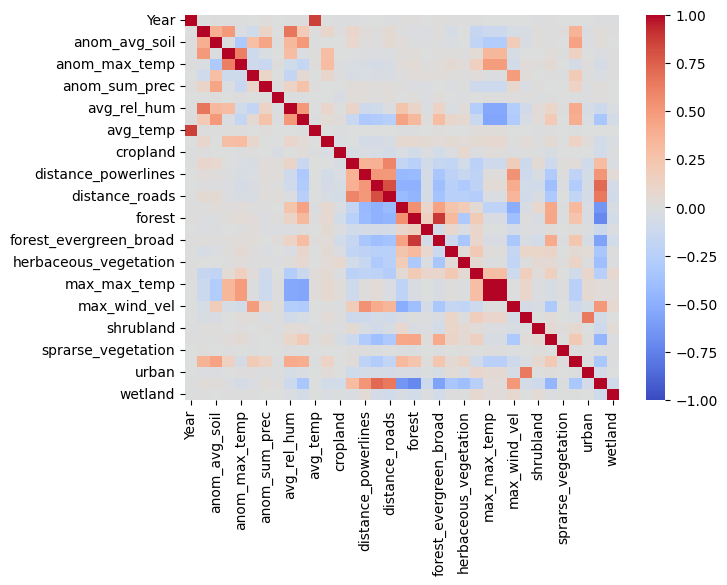

In [28]:
numerical_features = sorted(df.select_dtypes(include=["int64", "float64"]).columns)
corr_num = df[numerical_features].corr() # using Pearson correlation (catches only linear correlation)
plt.figure(figsize=(7, 5))
sns.heatmap(corr_num, cmap='coolwarm', vmin=-1, vmax=1);

In [29]:
# print the most correlated features
threshold = 0.8
high_corr = []
for i in range(len(corr_num.columns)):
    for j in range(i+1, len(corr_num.columns)):
        if abs(corr_num.iloc[i, j]) > threshold:
            high_corr.append((corr_num.columns[i], corr_num.columns[j], corr_num.iloc[i, j]))

for i, j, corr in high_corr:
    print(f"Features {i} and {j} have a correlation of {corr:.2f}")

Features Year and avg_temp have a correlation of 0.87
Features distance_rivers and distance_roads have a correlation of 0.81
Features forest and forest_evergreen_broad have a correlation of 0.88
Features max_max_temp and max_temp have a correlation of 1.00


There are many features with correlations above 80%. But most of them seem plausible except for `max_max_temp` and `max_temp` which are basically a linear function of each other and using both of them does not add any statistical significance to the modeling. Since we do not have information about `max_max_temp` we will drop it and keep `max_temp` which we have an interpretation for (maximum temperature over the day).

Also, the high colinearity is not an issue for tree models but it could harm linear models.

In [30]:
# drop max_max_temp column
df.drop(columns=['max_max_temp'], axis=1, inplace=True)

In [31]:
corr_num['ignition'].sort_values(ascending=False)

ignition                  1.000000
max_max_temp              0.295061
max_temp                  0.295061
forest_unknown            0.214991
forest                    0.195948
pop_dens                  0.164212
anom_max_temp             0.159961
slope                     0.151001
urban                     0.100623
forest_deciduous_broad    0.097047
forest_evergreen_broad    0.091934
wetland                   0.076226
herbaceous_vegetation     0.061074
avg_wind_angle            0.052935
elevation                 0.052914
anom_avg_temp             0.040492
anom_max_wind_vel         0.028027
shrubland                 0.026196
avg_temp                  0.016005
Year                      0.007141
aspect                   -0.004457
sprarse_vegetation       -0.006609
cropland                 -0.022591
sum_prec                 -0.089895
anom_sum_prec            -0.108783
max_wind_vel             -0.110330
avg_soil                 -0.136939
anom_avg_rel_hum         -0.156299
anom_avg_soil       

### Distribution visualization

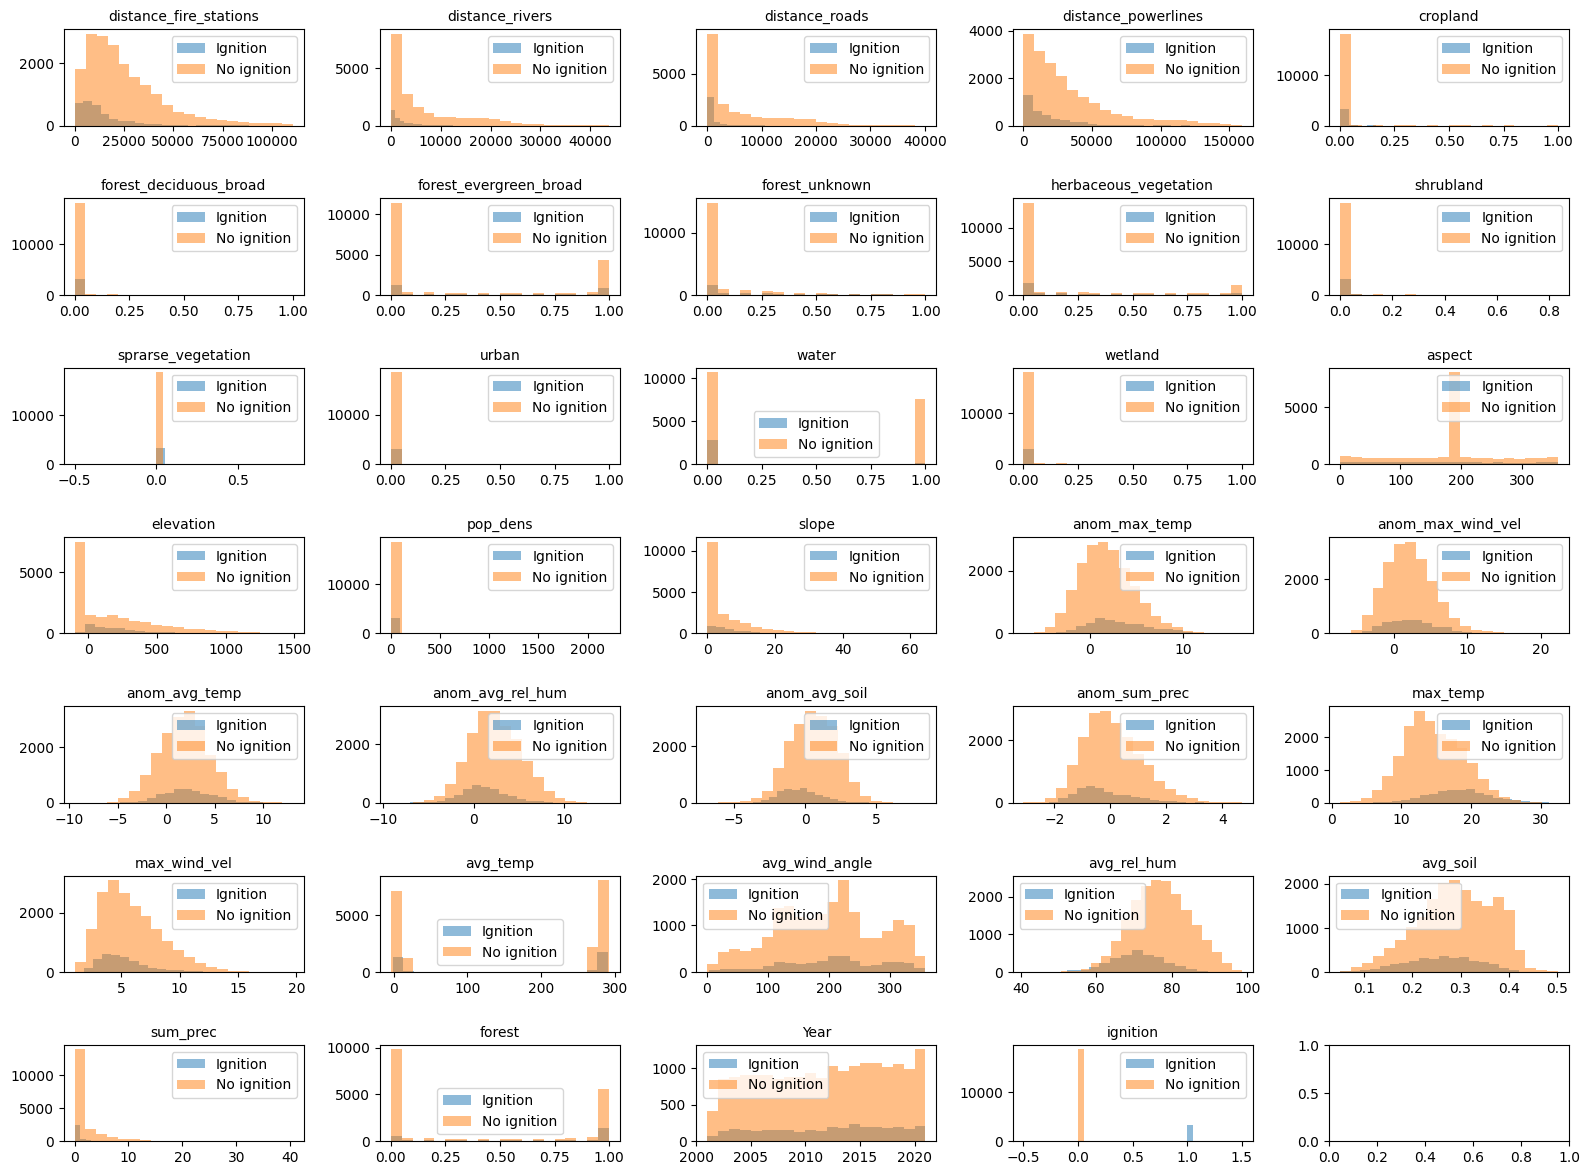

In [32]:
# filter numerical and categorical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

data_ignition = df[df['ignition'] == 1]
data_no_ignition = df[df['ignition'] == 0]

fig, axes = plt.subplots(7, 5, figsize=[16, 12])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

for i, col in enumerate(numerical_features):
    plt.sca(axes[i])
    plt.title(col, fontsize=10)
    plt.hist(data_ignition[col], bins=20, alpha=0.5, label='Ignition')
    plt.hist(data_no_ignition[col], bins=20, alpha=0.5, label='No ignition')
    plt.legend()

plt.tight_layout()
plt.show()

From all the distributions above we can see that the numerical features present large ranges of values and they are different from feature to feature making it hard to compare their contributions. Another thing is that most distributions are skewed to the left. For that we will need to scale these features using a Min Max Scaler. 

Note : I tried using Standard Scaler to avoid the effect of outliers on the features but some algorithms did not converge : e.g Logistic Regression.

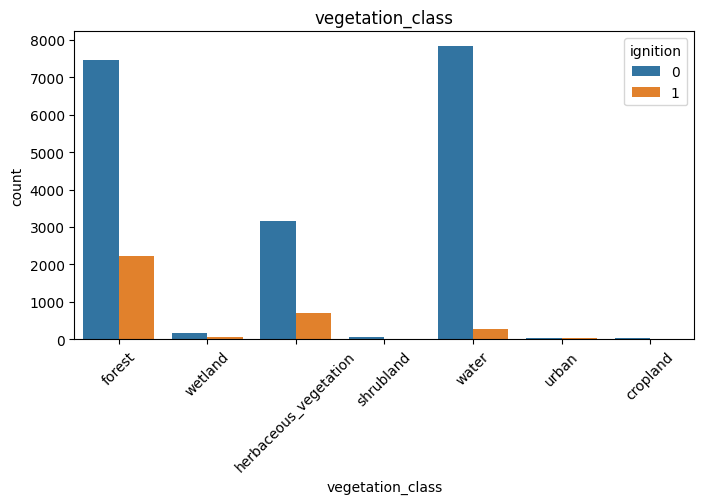

In [33]:
# categorical columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='ignition', data=df)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    plt.show()

From this figure, we can see that ignitions occure the most in forests and herbaceous vegetation, while other vegetation classes have very few occurences of ignitions. We can note that cropland does not have any positive class.

# Pipeline

Before we transform the data, it is always a good idea to 'learn' the transformation on the training set then apply it to the validation set. This avoids data leakage and optimistic performance estimations.

In [34]:
y = df['ignition'].astype(int)
X = df.drop('ignition', axis=1)

# split the data into train/val while stratifying by ignition class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y)

In [35]:
X_train.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_unknown,herbaceous_vegetation,shrubland,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year
11047,3259.601203,2121.320344,1500.000000,2795.084972,0.0,0.0,0.0,0.000000,0.00,0.0,...,12.387063,4.271291,281.684931,120.008888,91.394508,0.362540,0.000000,0.000000,water,2011
19193,27323.295921,16070.158680,14960.364300,96301.609540,0.0,0.0,0.0,0.000000,0.00,0.0,...,10.420121,9.553046,4.454545,138.806534,71.201118,0.352569,0.000000,0.000000,water,2006
19995,29087.153522,5798.706752,559.016994,14903.858561,0.0,0.0,0.0,0.000000,1.00,0.0,...,13.615336,7.068855,278.985592,235.042068,72.145988,0.327916,1.840729,0.000000,herbaceous_vegetation,2018
16009,8003.905297,2462.214450,559.016994,8792.752698,0.0,0.0,1.0,0.000000,0.00,0.0,...,10.549438,3.821793,6.105999,236.085861,84.810242,0.320061,2.137362,1.000000,forest,2009
2852,7846.177413,750.000000,0.000000,31484.122983,0.0,0.0,0.0,0.416667,0.25,0.0,...,14.868828,6.695231,6.106079,278.373383,69.353271,0.284684,0.000000,0.416667,forest,2009


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ignition, dtype: int64

We will use a Pipeline from sklearn to make data pre-processing and feeding it into ML models more straightforward and automatic.

In [37]:
# numerical preprocessor : scaler
numerical_preprocessor = make_pipeline(
    MinMaxScaler())

# categorical preprocessor : One Hot Encoding
categorical_preprocessor = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown="ignore", drop='if_binary'))

# combine both preprocessors
processor = make_column_transformer(
    (numerical_preprocessor, make_column_selector(dtype_include=["int64", "float64"])),
    (categorical_preprocessor, make_column_selector(dtype_include=["object"])),
    remainder="drop")

processor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faafb877b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faafb8911e0>)])

In [38]:
# fit the processor on the train data
processor.fit_transform(X_train).shape

(17624, 40)

We get 40 features : 33 for numerical features and 7 for vegetation class.

# Modeling

We will test the following models 

- Logistic regression 
- Support vector machine
- Decision Tree
- Random Forest
- XGBoost

For all models, we will run a grid search for a portion of relevant hyperparameters.

## Logistic Regression

In [39]:
# create a custom scorer for Precision-Recall AUC
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

In [40]:
lr_classifier = make_pipeline(processor, LogisticRegression(max_iter=1000))
lr_classifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faafb877b50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faafb8911e0>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [41]:
# grid search for C : Inverse of regularization strength 
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_lr = GridSearchCV(lr_classifier, param_grid, cv=5, n_jobs=-1, verbose=2, scoring=pr_auc_scorer)
clf_lr.fit(X_train, y_train);

print(clf_lr.best_params_)
clf_lr.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[CV] END ........................logisticregression__C=0.001; total time=   0.2s
[CV] END ........................logisticregression__C=0.001; total time=   0.2s
[CV] END .........................logisticregression__C=0.01; total time=   0.2s
[CV] END ........................logisticregression__C=0.001; total time=   0.3s
[CV] END .........................logisticregression__C=0.01; total time=   0.3s
[CV] END .........................logisticregression__C=0.01; total time=   0.4s
[CV] END ........................logisticregression__C=0.001; total time=   0.3s
[CV] END .........................logisticregression__C=0.01; total time=   0.3s
[CV] END ........................logisticregression__C=0.001; total time=   0.4s
[CV] END .........................logisticregression__C=0.01; total time=   0.3s
[CV] END ..........................logisticregression__C=0.1; total time=   0.5s
[CV] END ..........................logisticregression__C=0.1; total time=   0.4s
[CV] END ...................

0.5699929810942412

In [42]:
y_pred_lr = clf_lr.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3742
           1       0.59      0.31      0.41       664

    accuracy                           0.86      4406
   macro avg       0.74      0.64      0.67      4406
weighted avg       0.84      0.86      0.85      4406



The first thing we notice is that the recall is very low for the positive class.

## SVM

Another model that is well-suited for classification problems is the support vector classifier (SVC). Let us get a quick first estimate using a radial basis function kernel.

In [43]:
svm_classifier = make_pipeline(processor, SVC(kernel='rbf', C=0.4))

In [44]:
# grid search
param_grid = {'svc__C':[0.1, 10],'svc__gamma':[0.1, 0.001]}
clf_svm = GridSearchCV(
    svm_classifier, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring='f1') # using the PR-AUC scorer slows down the method so we use only 'f1' as a proxy

clf_svm.fit(X_train, y_train);
print(clf_svm.best_params_)
clf_svm.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[CV] END .......................svc__C=0.1, svc__gamma=0.001; total time=  20.4s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=  20.7s
[CV] END .......................svc__C=0.1, svc__gamma=0.001; total time=  21.5s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=  21.7s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=  22.1s
[CV] END .......................svc__C=0.1, svc__gamma=0.001; total time=  22.2s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=  22.3s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=  22.3s
[CV] END .......................svc__C=0.1, svc__gamma=0.001; total time=  18.0s
[CV] END .......................svc__C=0.1, svc__gamma=0.001; total time=  18.2s
[CV] END ........................svc__C=10, svc__gamma=0.001; total time=  19.4s
[CV] END ..........................svc__C=10, svc__gamma=0.1; total time=  19.5s
[CV] END ...................

0.40402369790390846

In [45]:
y_pred_svm = clf_svm.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3742
           1       0.67      0.26      0.37       664

    accuracy                           0.87      4406
   macro avg       0.77      0.62      0.65      4406
weighted avg       0.85      0.87      0.84      4406



We notice the same thing for SVM, the recall for the positive class is very low.

## Decision Tree

In [46]:
# grid search
dt_pipeline = make_pipeline(processor, DecisionTreeClassifier())
param_grid_dt = {'decisiontreeclassifier__max_depth': [None, 5, 7],
                 'decisiontreeclassifier__min_samples_split': [5, 10]}
clf_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, n_jobs=-1, verbose=2, scoring=pr_auc_scorer)
clf_dt.fit(X_train, y_train)

print(clf_dt.best_params_)
print(clf_dt.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=10; total time=   0.5s
[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5; total time=   0.6s
[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=10; total time=   0.6s
[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5; total time=   0.6s
[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5; total time=   0.6s
[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=10; total time=   0.6s[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5; total time=   0.6s

[CV] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5; total time=   0.6s
[CV] END decisiontreeclassifier__max_depth=5, decisiontreeclassifier__min_samples_split=5; to

## Random Forest

In [47]:
# grid search
rf_pipeline = make_pipeline(processor, RandomForestClassifier())
param_grid_rf = {'randomforestclassifier__n_estimators': [200, 400, 500],
                 'randomforestclassifier__max_depth': [None, 3]}
clf_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring=pr_auc_scorer)
clf_rf.fit(X_train, y_train)

print(clf_rf.best_params_)
print(clf_rf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=200; total time=  10.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=200; total time=  10.6s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=200; total time=  10.7s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=200; total time=  10.9s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=200; total time=  11.7s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=400; total time=  21.3s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=400; total time=  21.3s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=400; total time=  22.1s
[CV] END randomforestclassifier__max_depth=3, randomforestclassifier__n_estimators=200; total time=   4.1s
[CV] END rand

## XGBoost

In [48]:
xgb_pipeline = make_pipeline(processor, XGBClassifier())
param_grid_xgb = {'xgbclassifier__n_estimators': [100, 300],
                  'xgbclassifier__max_depth': [3, 7],
                  'xgbclassifier__learning_rate': [0.01, 0.1]}
clf_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring=pr_auc_scorer)
clf_xgb.fit(X_train, y_train)

print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100; total time=   0.7s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100; total time=   0.7s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100; total time=   0.8s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100; total time=   0.8s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100; total time=   0.8s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=300; total time=   1.4s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=300; total time=   1.5s
[CV] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=300; total time=   1.7s
[CV] END

## Compare classifiers

In [49]:
# helper function to evaluate models and print metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # predict proba for PR-AUC
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # PR-AUC
    train_pr_auc = average_precision_score(y_train, y_train_prob)
    test_pr_auc = average_precision_score(y_test, y_test_prob)

    print(f"Model: {model.steps[-1][0]}")
    print(f"Train Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, PR-AUC: {train_pr_auc:.4f}")
    print(f"Test Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, PR-AUC: {test_pr_auc:.4f}\n")
    print(30 * "*")

Let's compare all the previous classifiers using a PR curve.

Model: logisticregression
Train Precision: 0.6317, Recall: 0.3630, PR-AUC: 0.5741
Test Precision: 0.5876, Recall: 0.3133, PR-AUC: 0.5186

******************************
Model: svc
Train Precision: 0.7396, Recall: 0.3155, PR-AUC: 0.6470
Test Precision: 0.6654, Recall: 0.2575, PR-AUC: 0.5775

******************************
Model: decisiontreeclassifier
Train Precision: 0.6461, Recall: 0.4804, PR-AUC: 0.6056
Test Precision: 0.6295, Recall: 0.4247, PR-AUC: 0.5521

******************************
Model: randomforestclassifier
Train Precision: 1.0000, Recall: 1.0000, PR-AUC: 1.0000
Test Precision: 0.7797, Recall: 0.4744, PR-AUC: 0.7268

******************************
Model: xgbclassifier
Train Precision: 1.0000, Recall: 0.9955, PR-AUC: 1.0000
Test Precision: 0.7515, Recall: 0.5557, PR-AUC: 0.7519

******************************


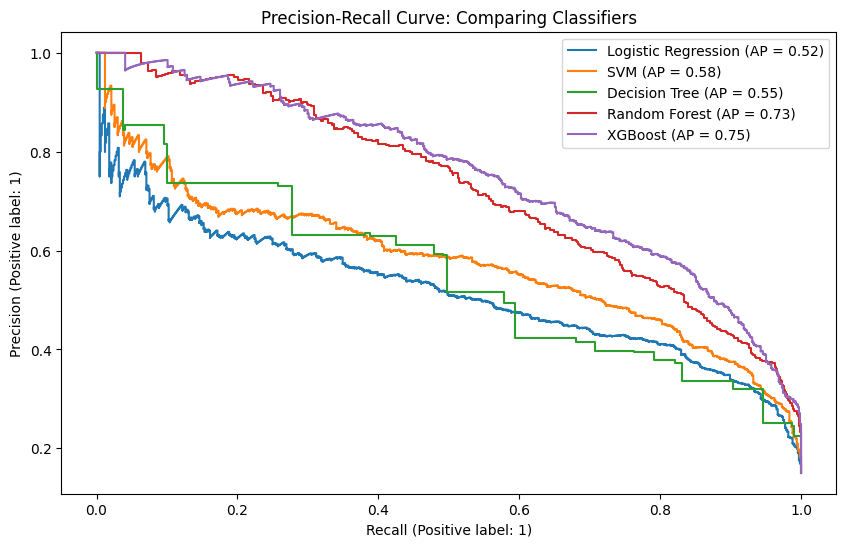

In [50]:
# classifiers
lr_classifier = make_pipeline(processor, LogisticRegression(max_iter=1000, C=1000))
svm_classifier = make_pipeline(processor, SVC(C=10, gamma=0.1, probability=True))
dt_classifier = make_pipeline(processor, DecisionTreeClassifier(**{'max_depth': 5, 'min_samples_split': 10}))
rf_classifier = make_pipeline(processor, RandomForestClassifier(**{'max_depth': None, 'n_estimators': 400}))
xgb_classifier = make_pipeline(processor, XGBClassifier(**{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}))

# fit
lr_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# print metrics
evaluate_model(lr_classifier, X_train, y_train, X_test, y_test)
evaluate_model(svm_classifier, X_train, y_train, X_test, y_test)
evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)
evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)

# plot PR curves
plt.figure(figsize=(10, 6))

# Logistic Regression
PrecisionRecallDisplay.from_estimator(lr_classifier, X_test, y_test, name="Logistic Regression", ax=plt.gca())

# SVM
PrecisionRecallDisplay.from_estimator(svm_classifier, X_test, y_test, name="SVM", ax=plt.gca())

# Decision Tree
PrecisionRecallDisplay.from_estimator(dt_classifier, X_test, y_test, name="Decision Tree", ax=plt.gca())

# Random Forest
PrecisionRecallDisplay.from_estimator(rf_classifier, X_test, y_test, name="Random Forest", ax=plt.gca())

# XGBoost
PrecisionRecallDisplay.from_estimator(xgb_classifier, X_test, y_test, name="XGBoost", ax=plt.gca())

plt.title("Precision-Recall Curve: Comparing Classifiers")
plt.legend(loc="best")
plt.show()

These scores show that while on the train set we get high precision, recall and PR-AUC, the models suffer from an overfitting problem on test set with low metrics on the test set. The models have a very low recall on the test set, which indicates that the models are not very good at classifying the ignition class.

On the Precision-Recall curve, we can see that all the models are far from the perfect score of (1, 1) which means that there is room for improvement. The best performing model is XGBoost with an average precision AP=0.75 then comes Random Forest with an AP=0.73.

## Impute yearly_avg_temp

By imputing the yearly_avg_temp with the most recent knwon value and retraining all the models, we do not notice any improvements and it slightly degrades the performance of XGBoost. So dropping this column is better.

# Prediction

Here is how we can perform prediction on a new dataset that has the same columns expected as features.

In [51]:
def predict_ignition(model, dataframe):
    """Predict the ignition probability."""
    # predict
    probabilities = model.predict_proba(dataframe)

    # create a DataFrame with the prediction probabilities
    pred_df = pd.DataFrame(probabilities[:, 1], columns=['ignition'])
    return pred_df

In [52]:
xgb_classifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faafb877b50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [53]:
# predict ignition
predictions_df = predict_ignition(xgb_classifier, X_test)

# write predictions to CSV
# predictions_df.to_csv("./predictions.csv", index=True)

### Few last things

- Other normalization techniques could be used such as Robust Scaler.
- We can also try feature engineering : in particular we can combine the month with other numerical features like monthly precipitation.
- The Year column is treated as a continuous feature which might not be adapted.